# **Algerian Forest Fire Prediction - Logistic Reg.**

# Import Data and Required Packages

# Importing Necessary Libraries

In [251]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from warnings import filterwarnings
from sklearn.metrics import accuracy_score, confusion_matrix
filterwarnings('ignore')
%matplotlib inline

### Loading the Algerian Forest Fire Dataset

In [252]:
df=pd.read_csv('/content/Algerian_forest_fires_dataset_UPDATE.csv',header=1)

In [253]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [254]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


In [255]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

In [259]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
count,246,245,245,245,245,245,245,245,245,245,245,245,245,244
unique,33,5,2,20,63,19,40,174,167,199,107,175,128,9
top,01,07,2012,35,64,14,0,88.9,7.9,8,1.1,3,0.4,fire
freq,8,62,244,29,10,43,133,8,5,5,8,5,12,131


In [257]:
df.iloc[121:125,:]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
124,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire


# Data Cleaning

In [260]:
df.drop([122,123],inplace=True)

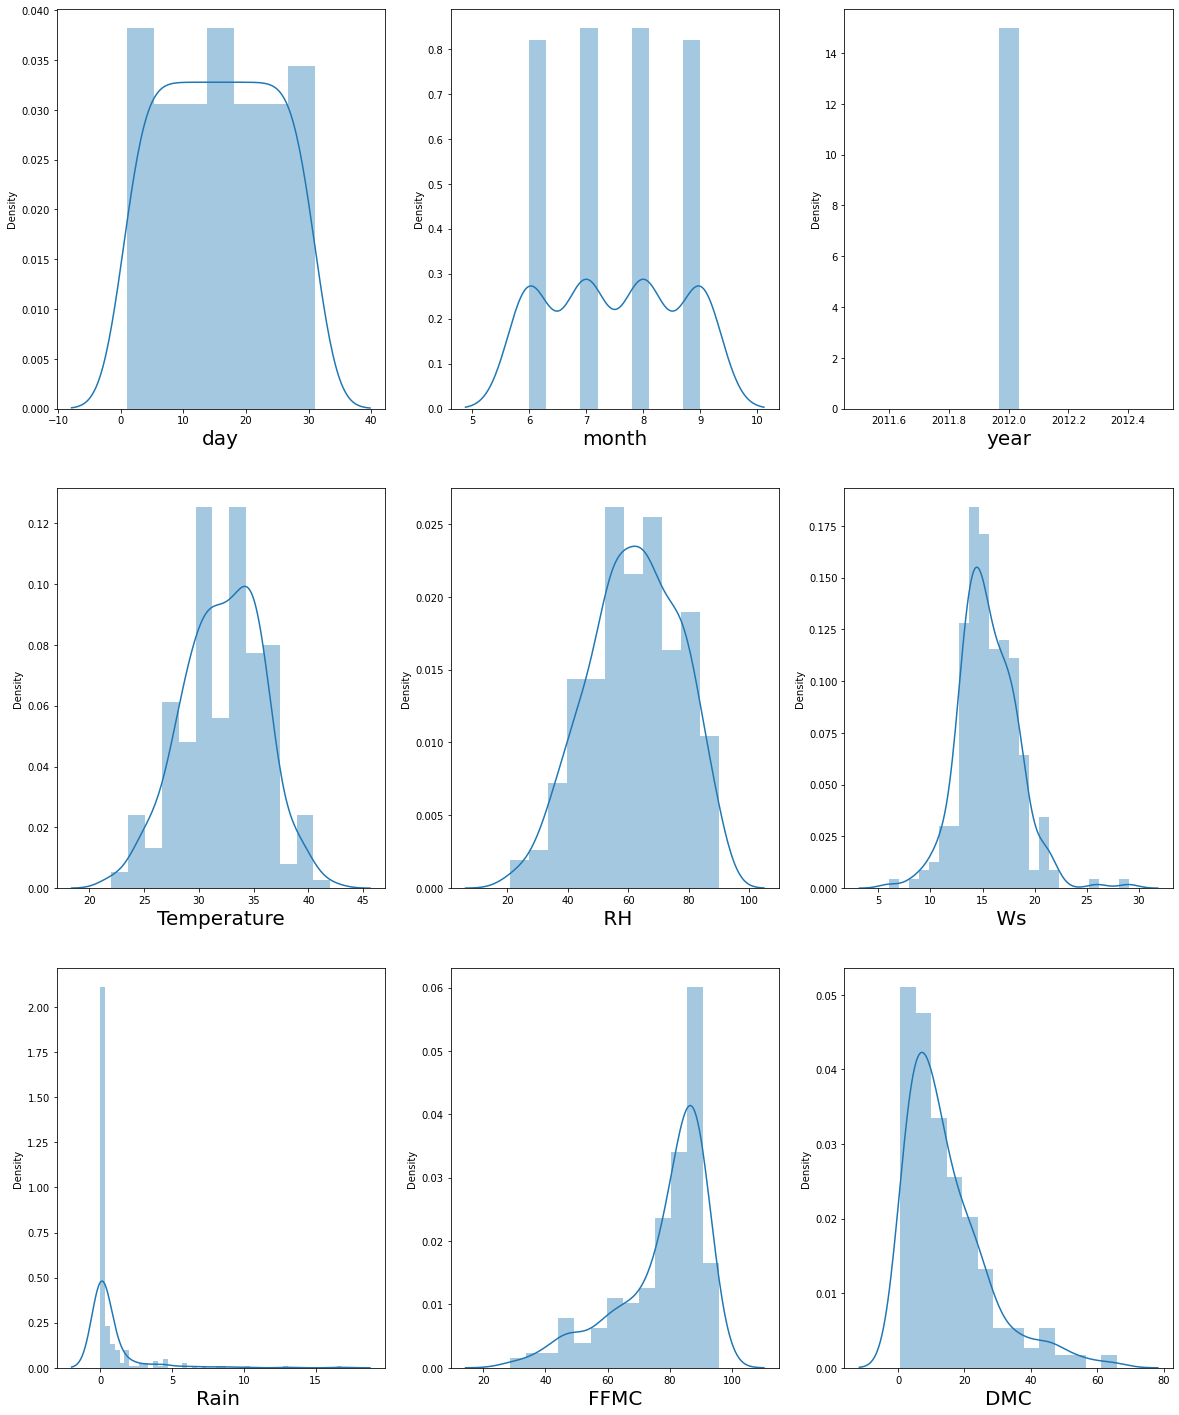

In [48]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber=1
for column in df:
   if plotnumber<=9:
     ax=plt.subplot(3,3,plotnumber)
     sns.distplot(df[column])
     plt.xlabel(column,fontsize=20)
   plotnumber+=1

plt.show()  

## Resetting the index and dropping the index column

In [261]:
df.reset_index(inplace=True)
df.drop('index',axis=1,inplace=True)

Checking the Column Headers

In [263]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

Removing unnecessary space in column headers using str.strip()

In [264]:
df.columns=df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

### **Dropping rows with null values**

In [265]:
df.dropna(inplace=True)

### Converting the necessary column dataye to int

In [266]:
df.dtypes

day            object
month          object
year           object
Temperature    object
RH             object
Ws             object
Rain           object
FFMC           object
DMC            object
DC             object
ISI            object
BUI            object
FWI            object
Classes        object
dtype: object

In [267]:
df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']]=df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']].astype(int)

In [268]:
df.dtypes

day             int64
month           int64
year            int64
Temperature     int64
RH              int64
Ws              int64
Rain           object
FFMC           object
DMC            object
DC             object
ISI            object
BUI            object
FWI            object
Classes        object
dtype: object

Values in df[Classes] has unnecessary spaces that are removed by str.strip()

In [269]:
df.Classes.unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

In [270]:
df.Classes=df.Classes.str.strip()
df.Classes.unique()

array(['not fire', 'fire'], dtype=object)

In [271]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

In [272]:
df[['Rain', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI']]=df[['Rain', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI']].astype('float')

In [273]:
df.dtypes

day              int64
month            int64
year             int64
Temperature      int64
RH               int64
Ws               int64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes         object
dtype: object

In [274]:
df['Temperature'].shape

(243,)

In [275]:
q=df['Temperature'].quantile(0.98)
data_cleaned=df[df['Temperature']<q]

In [276]:
q=df['day'].quantile(0.98)
data_cleaned=df[df['day']<q]

In [277]:
q=data_cleaned['Ws'].quantile(0.99)
data_cleaned=data_cleaned[data_cleaned['Ws']<q]

In [278]:
q=data_cleaned['RH'].quantile(0.99)
data_cleaned=data_cleaned[data_cleaned['RH']<q]

In [279]:
q=data_cleaned['DMC'].quantile(0.95)
data_cleaned=data_cleaned[data_cleaned['DMC']<q]

In [280]:
q=data_cleaned['FFMC'].quantile(0.99)
data_cleaned=data_cleaned[data_cleaned['FFMC']<q]

In [281]:
q=data_cleaned['month'].quantile(0.99)
data_cleaned=data_cleaned[data_cleaned['month']<q]

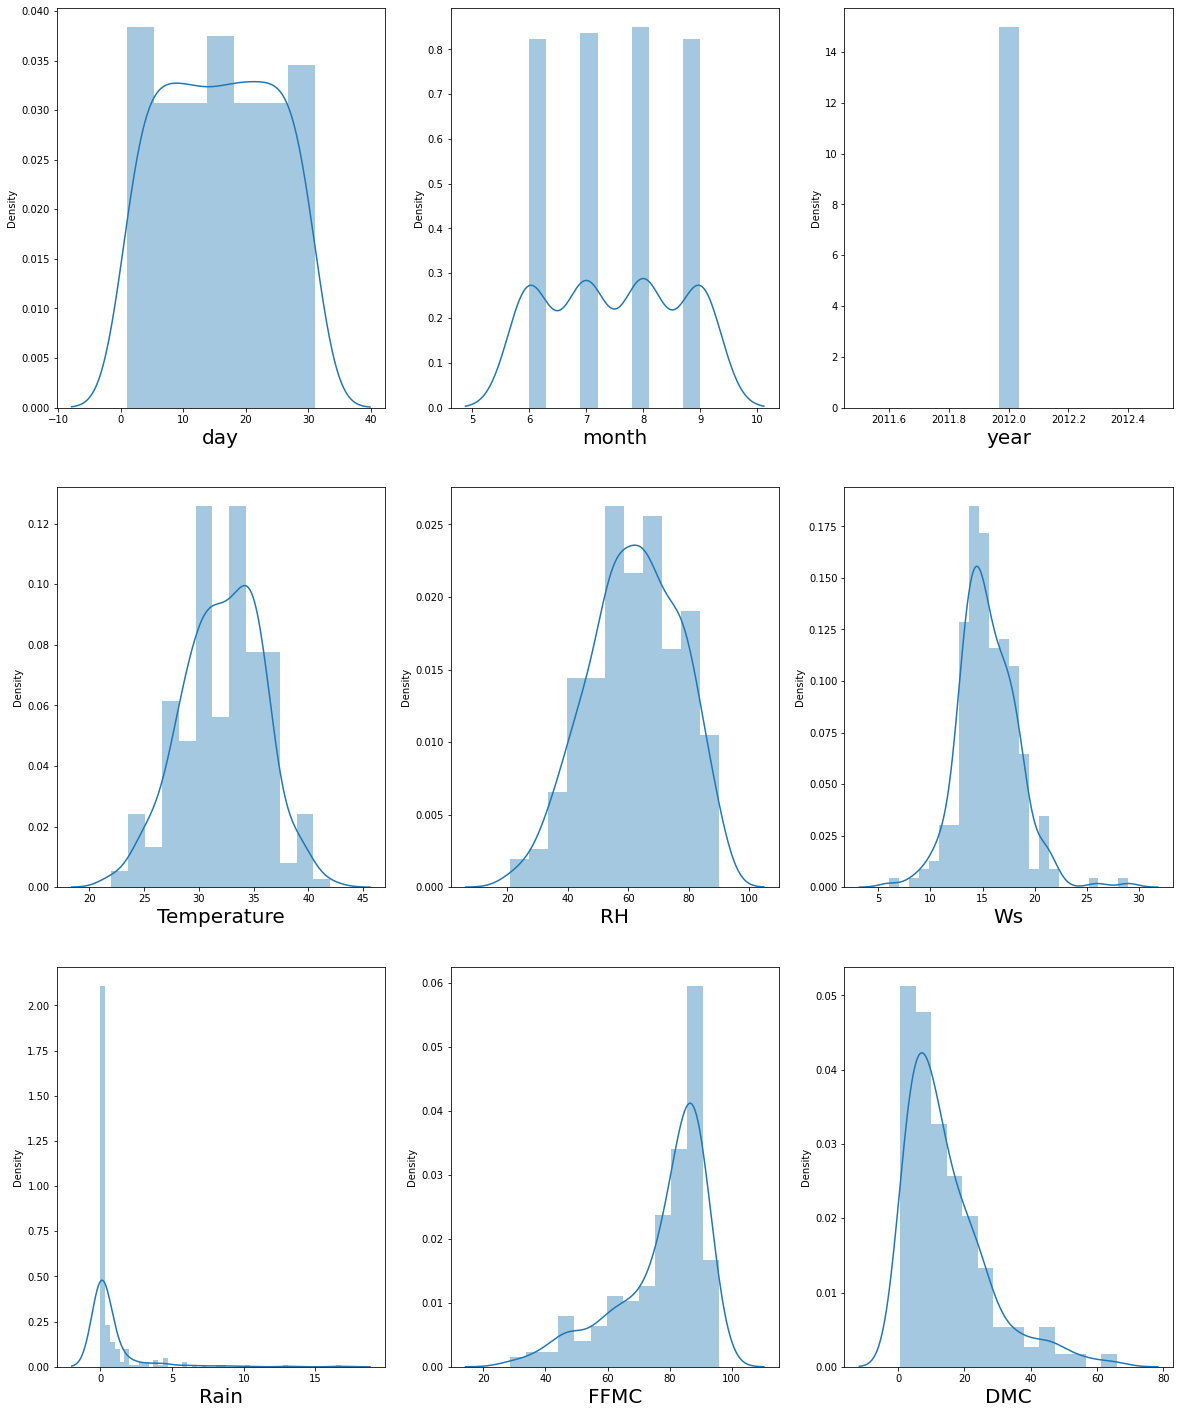

In [282]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber=1
for column in df:
  if plotnumber<=9:
    ax=plt.subplot(3,3,plotnumber)
    sns.distplot(df[column])
    plt.xlabel(column,fontsize=20)
  plotnumber+=1

plt.show()

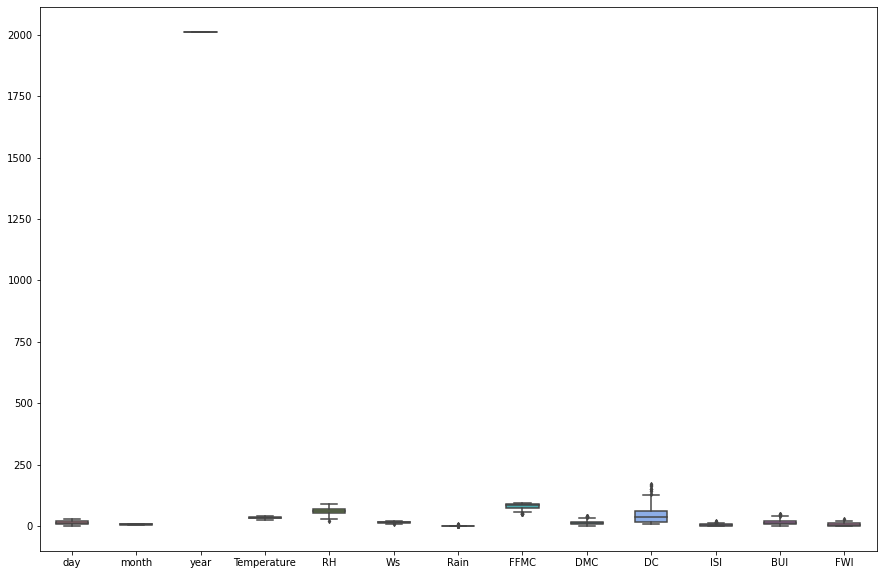

In [75]:
fig, ax=plt.subplots(figsize=(15,10))
sns.boxplot(data=data_cleaned, width=0.5, ax=ax, fliersize=3)

In [283]:
data_cleaned.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire
5,6,6,2012,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5,fire
6,7,6,2012,33,54,13,0.0,88.2,9.9,30.5,6.4,10.9,7.2,fire


In [284]:
X=data_cleaned.drop(columns=['Classes'])

In [285]:
X

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5
5,6,6,2012,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5
6,7,6,2012,33,54,13,0.0,88.2,9.9,30.5,6.4,10.9,7.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,20,8,2012,36,81,15,0.0,83.7,34.4,107.0,3.8,38.1,9.0
203,21,8,2012,36,71,15,0.0,86.0,36.9,117.1,5.1,41.3,12.2
204,22,8,2012,37,53,14,0.0,89.5,41.1,127.5,8.0,45.5,18.1
210,28,8,2012,35,56,14,0.4,79.2,37.0,166.0,2.1,30.6,6.1


In [286]:
y=data_cleaned['Classes']

In [287]:
y

0      not fire
1      not fire
4      not fire
5          fire
6          fire
         ...   
202        fire
203        fire
204        fire
210    not fire
211        fire
Name: Classes, Length: 152, dtype: object

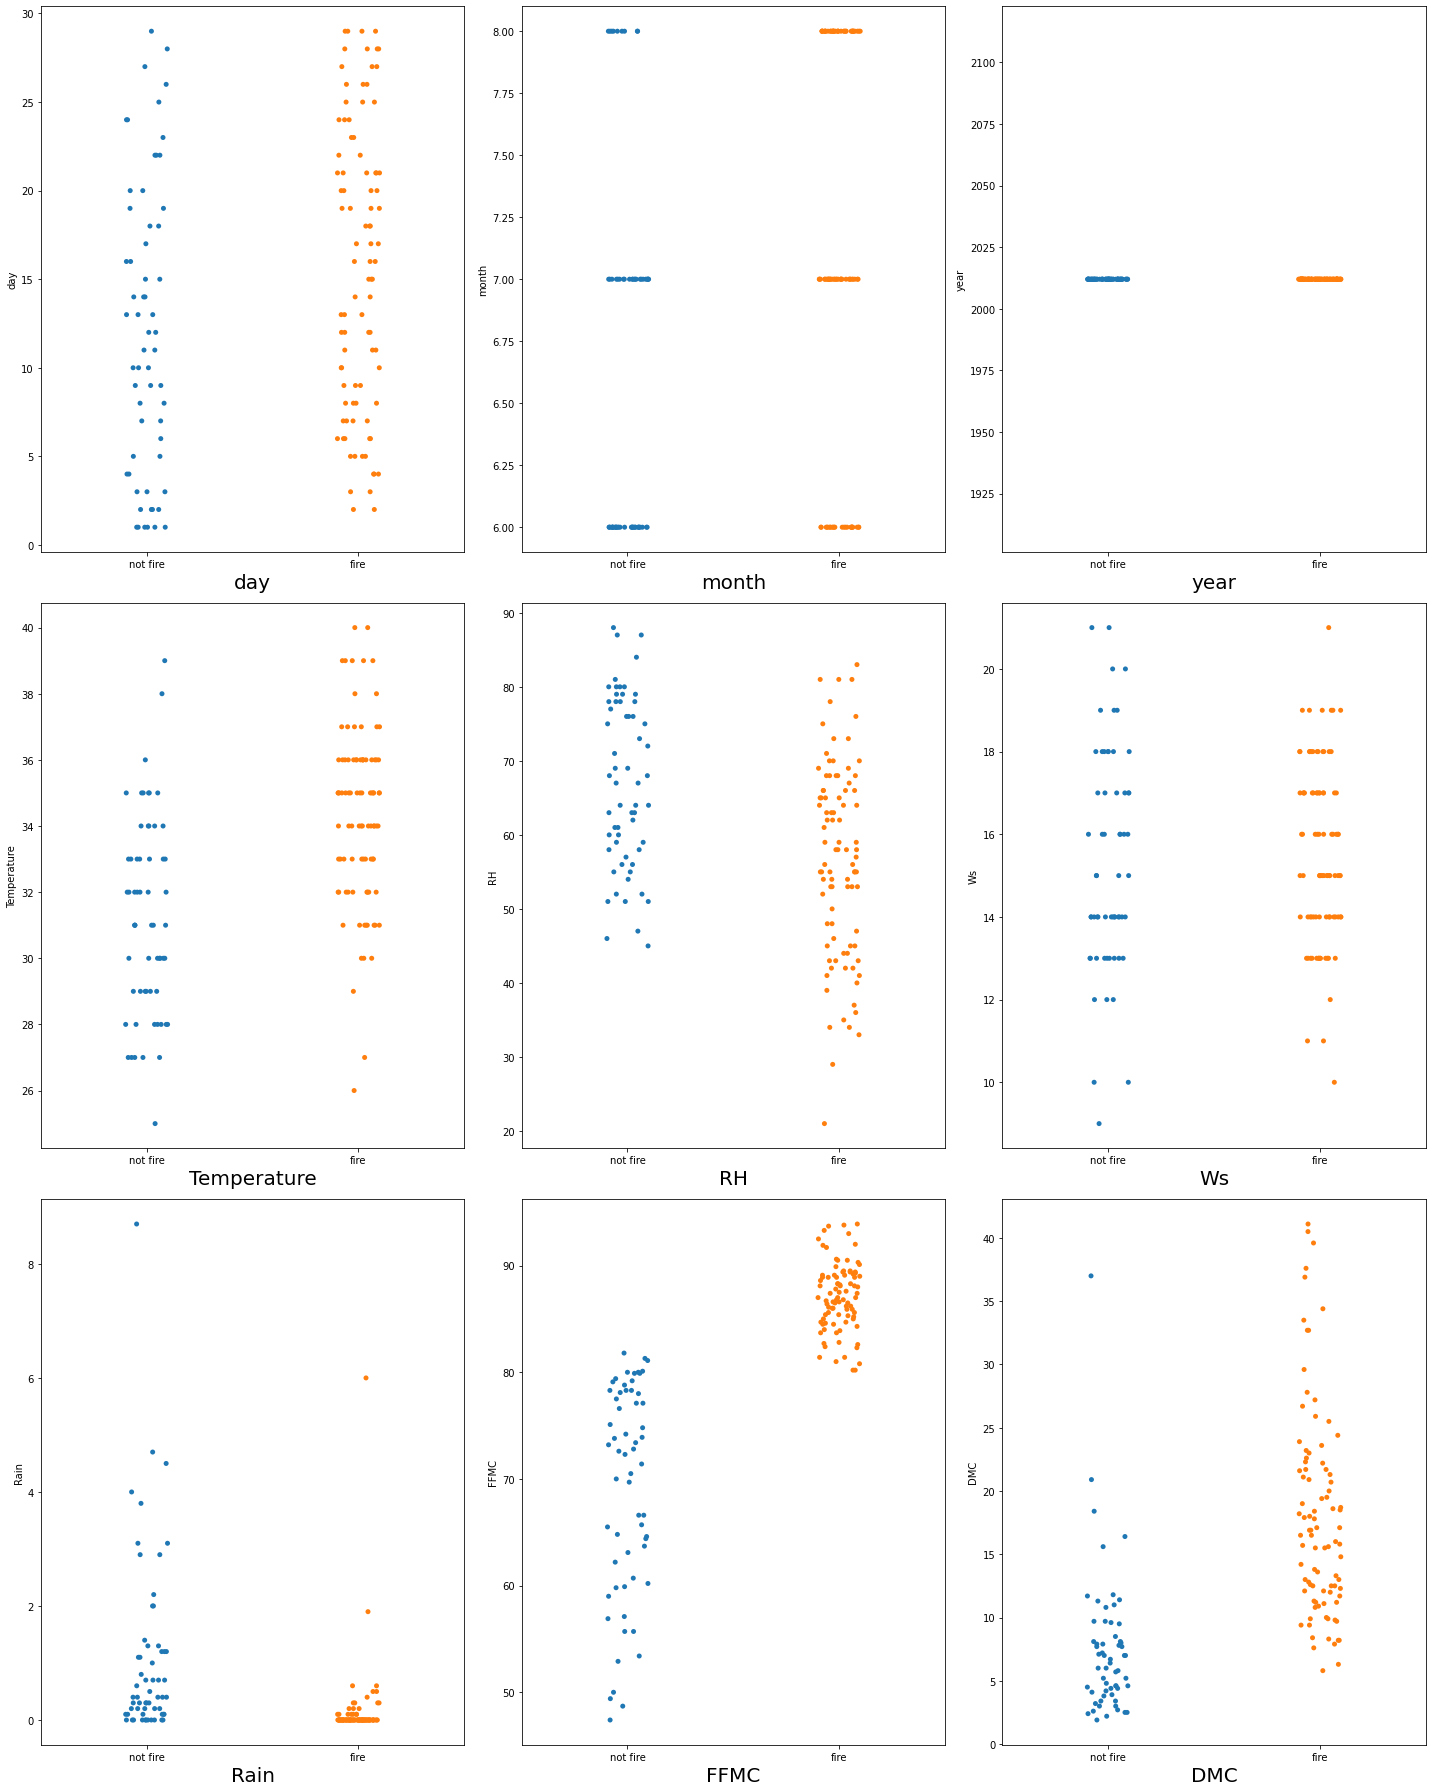

In [81]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber=1
for column in X:
  if plotnumber<=9:
    ax=plt.subplot(3,3,plotnumber)
    sns.stripplot(y,X[column])
    plt.xlabel(column,fontsize=20)
  plotnumber+=1

plt.tight_layout()

In [288]:
scalar=StandardScaler()
X_scaled=scalar.fit_transform(X)

In [289]:
X_scaled

array([[-1.60426326, -1.18239513,  0.        , ..., -0.91498855,
        -1.17751295, -1.00688574],
       [-1.48324688, -1.18239513,  0.        , ..., -0.99195494,
        -1.12944345, -1.02304013],
       [-1.12019772, -1.18239513,  0.        , ..., -0.94064401,
        -1.12944345, -1.00688574],
       ...,
       [ 0.93708082,  1.31377237,  0.        , ...,  0.80392741,
         2.86993877,  1.83628582],
       [ 1.66317913,  1.31377237,  0.        , ..., -0.70974485,
         1.43746773, -0.10224025],
       [ 1.78419552,  1.31377237,  0.        , ..., -0.55581208,
         1.43746773, -0.13454901]])

**Dropping the year column as the data is for the same year**

In [290]:
df1=df.drop(['year'],axis=1)

In [291]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
day,243.0,15.761317,8.842552,1.0,8.00,16.0,23.00,31.0
month,243.0,7.502058,1.114793,6.0,7.00,8.0,8.00,9.0
Temperature,243.0,32.152263,3.628039,22.0,30.00,32.0,35.00,42.0
RH,243.0,62.041152,14.828160,21.0,52.50,63.0,73.50,90.0
Ws,243.0,15.493827,2.811385,6.0,14.00,15.0,17.00,29.0
Rain,243.0,0.762963,2.003207,0.0,0.00,0.0,0.50,16.8
FFMC,243.0,77.842387,14.349641,28.6,71.85,83.3,88.30,96.0
DMC,243.0,14.680658,12.393040,0.7,5.80,11.3,20.80,65.9
DC,243.0,49.430864,47.665606,6.9,12.35,33.1,69.10,220.4
ISI,243.0,4.742387,4.154234,0.0,1.40,3.5,7.25,19.0


### **Encoding not fire as 0 and Fire as 1**

In [292]:
set(df1.Classes)

{'fire', 'not fire'}

In [294]:
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'Classes'. 
df1 ['Classes']= label_encoder.fit_transform(df1 ['Classes']) 
df1.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,1
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,1
2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,1
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,1
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,1


In [295]:
set(df1.Classes)

{0, 1}

In [296]:
df1

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,1
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,1
2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,1
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,1
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,9,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,0
240,27,9,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,1
241,28,9,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,1
242,29,9,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,1


In [315]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=95,test_size=.66)

# Feature **Scaling**

In [316]:
def Feature_Scaling(X_train, X_test):
    scaler = StandardScaler()
    X_train_after_Standardisation = scaler.fit_transform(X_train)
    X_test_after_Standardisation = scaler.transform(X_test)
    return X_train_after_Standardisation, X_test_after_Standardisation

In [317]:
X_train_after_Standardisation,X_test_after_Standardisation=Feature_Scaling(X_train, X_test)

In [318]:
logistic_regression=LogisticRegression()

In [319]:
logistic_regression.fit(X_train_after_Standardisation,y_train)

LogisticRegression()

In [320]:
print('Intercept is :',logistic_regression.intercept_)
print('Coefficient is :',logistic_regression.coef_)

Intercept is : [-1.58237008]
Coefficient is : [[ 0.31577466 -0.10404134  0.         -0.04678168  0.3999745   0.42962041
   0.64961217 -1.3216872   0.35076081  0.06387819 -1.19816948 -0.36179902
  -1.14750059]]


In [321]:
print("Training Score:",logistic_regression.score(X_train_after_Standardisation, y_train))
print("Test Score:",logistic_regression.score(X_test_after_Standardisation,y_test))

Training Score: 0.9607843137254902
Test Score: 0.900990099009901


In [322]:
Logistic_Regression_Prediction=logistic_regression.predict(X_test_after_Standardisation)

In [323]:
accuracy_score(y_test,Logistic_Regression_Prediction)

0.900990099009901

# Evaluation of a Classification **Model**



1.   Accuracy

2.   Precision

3.   Recall

4.   F1 Score




# **Confusion Matrix**


In [324]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test,Logistic_Regression_Prediction)
conf_mat

array([[55,  3],
       [ 7, 36]])

# Plotting Confusion Matrix

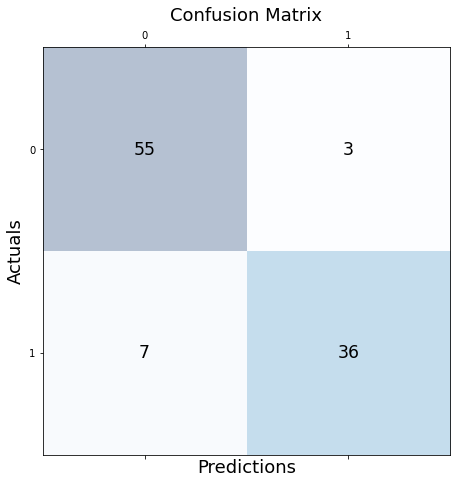

In [325]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=Logistic_Regression_Prediction)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Splitting the Confusion Matrix

In [326]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

# Accuracy =  (𝑇𝑃+𝑇𝑁)/(𝑇𝑃+𝑇𝑁+𝐹𝑃+𝐹𝑁)

In [327]:
# Breaking down the formula for Accuracy
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.900990099009901

## Our Model has an accuracy of 90%

# ***Precision***
Precision= 𝑇𝑃/(𝑇𝑃+𝐹𝑃)

In [328]:
Precision = true_positive/(true_positive+false_positive)
Precision

0.9482758620689655

### Our model has an Precision of 94%

# **Recall or** **Sensitivity**

The mathematical formula is:

Recall=  𝑇𝑃/(𝑇𝑃+𝐹𝑁) 


In [329]:
Recall = true_positive/(true_positive+false_negative)
Recall

0.8870967741935484

### Our Model has an Recall of 88%

# **F1 Score**

The mathematical formula is: F1 score=  
2∗((𝑃𝑟𝑒𝑐𝑖𝑠𝑖𝑜𝑛∗𝑅𝑒𝑐𝑎𝑙𝑙)/(𝑃𝑟𝑒𝑐𝑖𝑠𝑖𝑜+𝑅𝑒𝑐𝑎𝑙𝑙)

In [330]:
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.9166666666666667

In [ ]:
Logistic_Regression_Prediction

In [332]:
matrix=classification_report(y_test,Logistic_Regression_Prediction)
print('classification report:\n',matrix)

classification report:
               precision    recall  f1-score   support

        fire       0.89      0.95      0.92        58
    not fire       0.92      0.84      0.88        43

    accuracy                           0.90       101
   macro avg       0.91      0.89      0.90       101
weighted avg       0.90      0.90      0.90       101

